In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data= pd.read_csv('/content/3_user_data.csv', sep=',') 
logs= pd.read_csv('/content/3_logs.csv', sep=',') 

In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
user_data.shape

(2954, 3)

In [6]:
logs.shape

(4500, 4)

In [7]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [8]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [38]:
#Сколько уникальных значений принимает переменная platform
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [53]:
#Какой клиент совершил больше всего успешных операций?
#Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) 
#через запятую и пробел в порядке возрастания. 

max_logs = logs.query("success == True").groupby('client', as_index = False).agg({'platform': 'count'}).sort_values("platform", ascending = False)


In [54]:
max_logs.platform.max()

41

In [60]:
clients = max_logs.query("platform == '41'").sort_values("client").client.tolist()

In [63]:
for i in clients:
  print(i, end = ', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [72]:
#С какой платформы осуществляется наибольшее количество успешных операций?

logs.query("success == True").groupby('platform', as_index = False).agg({'client': 'count'}).sort_values("client", ascending = False)


,platform,client
1,phone,2019
0,computer,1090
2,tablet,180


In [79]:
#Какая платформа наиболее популярна среди премиумных клиентов?

sum_tab = logs.merge(user_data, on = 'client', how = "right")

In [81]:
sum_tab.query("premium == True").groupby('platform', as_index = False).agg({'client': 'count'}).sort_values("client", ascending = False)

,platform,client
1,phone,246
0,computer,150
2,tablet,24


In [102]:
sum_tab.query("premium == True").platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [99]:
#Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
#используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

age_data = user_data.query("premium == True").groupby('age', as_index = False).agg({'client': 'count'}).sort_values("age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


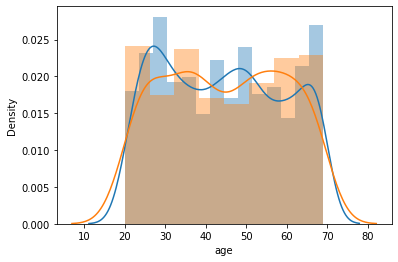

In [128]:
sns.distplot(sum_tab.query("premium == False").age)
sns.distplot(sum_tab.query("premium == True").age)

In [109]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f775787aa90>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


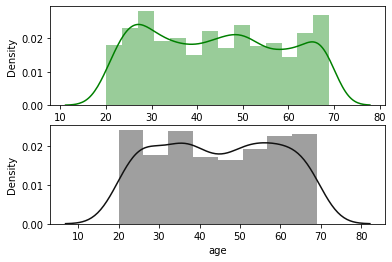

In [129]:
fig, ax = plt.subplots(nrows =2, ncols =1)

sns.distplot(sum_tab.query("premium == False").age, ax = ax[0], color= 'green')
sns.distplot(sum_tab.query("premium == True").age, ax = ax[1], color = '#1111')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


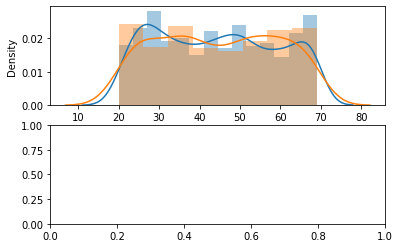

In [130]:
fig, ax = plt.subplots(nrows =2, ncols =1)

sns.distplot(sum_tab.query("premium == False").age, ax = ax[0])
sns.distplot(sum_tab.query("premium == True").age, ax = ax[0])

In [178]:
# Постройте график распределения числа успешных операций: 
#x – число успешных операций
#y – число клиентов, совершивших столько успешных операций

client_1 = sum_tab.query("success == True").groupby('client').agg({'success': 'sum'})

In [179]:
client_1.value_counts()

success
1          2051
2            42
41            9
40            1
3             1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


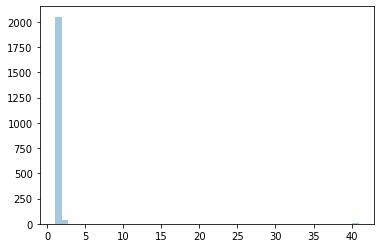

In [180]:
sns.distplot(client_1, kde = False)

In [213]:
#Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
#По оси x – возраст, y – число успешных операций. 
#Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

computer_client = sum_tab.query("platform == 'computer' and success == True").groupby('age', as_index = False).agg({'success': 'sum'})

In [206]:
computer_client.sort_values("success", ascending= False)

,age,success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26
4,24,26
49,69,24
45,65,23
32,52,22
34,54,22


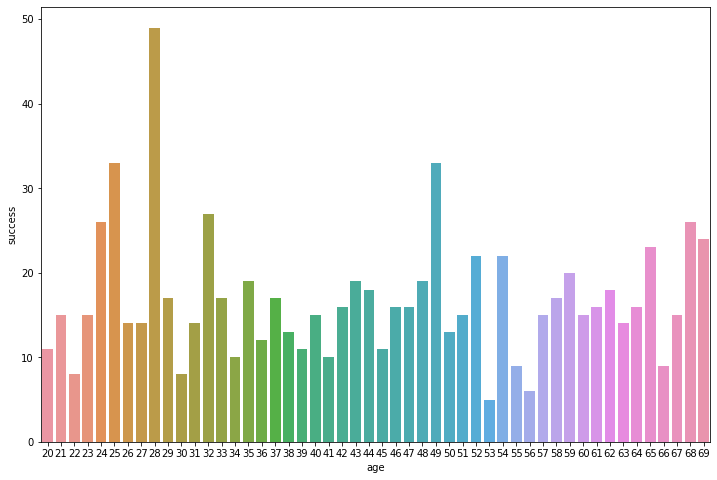

In [215]:
plt.figure(figsize=(12, 8))
sns.barplot(x= 'age', y= 'success', data = computer_client)